In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

In [9]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [10]:
pdlabels = pd.read_csv('formatted_full_train.csv', delimiter = ',')

In [11]:
pdlabels.head()

,Photo,AdoptionSpeed
0,35fc0fd89-1.jpg,1
1,35fc0fd89-2.jpg,1
2,35fc0fd89-3.jpg,1
3,35fc0fd89-4.jpg,1
4,f6b229568-1.jpg,4


In [13]:
bs = 64
data = ImageDataBunch.from_df('Data/train_images', pdlabels, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

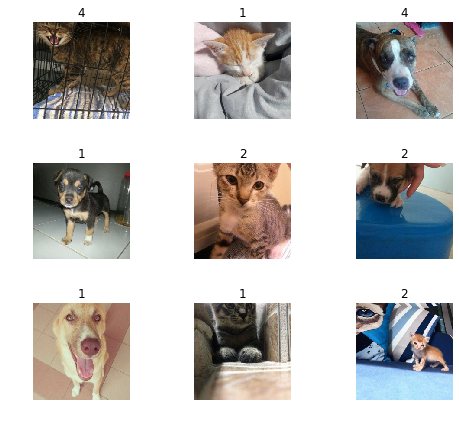

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4]


(5, 5)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/daniel/.torch/models/resnet34-333f7ec4.pth
87306240it [00:41, 2123014.76it/s]


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('test1')